In [61]:
print("===============================")
print("   This implements Example 3")
print("===============================")

   This implements Example 3


In [ ]:
"""
P.S., I think there is a typo in equation 4.8: It should
"""

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gammaln

In [63]:
def sample_x_given_y_n(y, n):
    return np.random.binomial(n, y)

In [64]:
def sample_y_given_x_n(x, n, alpha, beta):
    """
    x, n are given
    alpha, beta are distribution parameters and should be treated as constant
    """
    return np.random.beta(x + alpha, n - x + beta)

In [65]:
def f_n_given_x_y(n, x, y, lamb):
    """
    n, x, and y are parameters of the conditional probability
    lamb is the distribution parameter (lambda)
    
    Note that in equation 4.9, we can omit e^{-(1-y)*lamb} because it can be treated as a constnat
    and will not affect the proportionaility
    
    Since the value is too large, we take log for both numerator and denominator then get the
    exponential value
    """
    log_numerator = np.log((1. - y) * lamb) * (n - x)
    log_denominator = gammaln(n - x + 1)
    return np.exp(log_numerator - log_denominator)

In [66]:
def sample_n_given_x_y(x, y, lamb):
    """
    x, y, lamb: see function f_n_given_x_y for the definition
    
    We consider the range of n to be [x, x + 500) because f is underflow when n is too big
    """
    ns = range(x, x + 500)
    weights = [f_n_given_x_y(n, x ,y, lamb) for n in ns]
    sum_weight = sum(weights)
    prob = [w / sum_weight for w in weights]
    return np.random.choice(ns, p=prob)

In [67]:
def gibbs_sampler(k, alpha, beta, lamb):
    """
    k: Length of gibbs sampling
    alpha, beta, lamb: probability distribution parameters
    """
    
    # has to manually give the first y
    y = np.random.uniform(0, 1)
    n = np.random.randint(1, 10)  # 10 most likely values
    
    # iterate k times, take turns to sample x and y
    for _ in range(k):
        x = sample_x_given_y_n(y, n)
        y = sample_y_given_x_n(x, n, alpha, beta)
        n = sample_n_given_x_y(x, y, lamb)
    
    return x

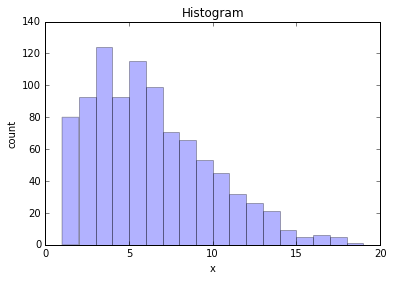

In [68]:
# main procedure
lamb = 16
alpha = 2
beta = 4
k = 10
num_samples = 1000

# do sampling
x_values = [gibbs_sampler(k, alpha, beta, lamb) for _ in range(num_samples)]

# plot histogram
bins = np.arange(1, 20, 1) # fixed bin size

plt.hist(x_values, bins=bins, alpha=0.3)
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('count')

plt.show()

In [72]:
print("You can see the shape is similar to Figure 5. However, it is not as smooth as what the paper reports.")

You can see the shape is similar to Figure 5. However, it is not as smooth as what the paper reports.
